## Anathi Hlaula 
## Image Set up 

#### the image preprocessing step of already cleaned image dataset building up to the model building for the cancer prediction

#### 1. Loading the Libraries 

In [1]:
import numpy as np
import tensorflow as tf
import os #interacting with the operating system
import cv2 #open computer vision
import imghdr #image header for the image extension
import matplotlib.pyplot as plt

#for Model building 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

C:\Users\Black\AppData\Local\Temp\ipykernel_12664\2435137779.py:5: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr #image header for the image extension


#### 2. Cleaning the data

In [2]:
#Let us create a data directory to use to access our data
training_data_dir = 'Data/train/'
testing_data_dir  = 'Data/test/'
valid_data_dir = 'Data/valid/'


In [3]:
# now that we have the directories for our dataset we can check the contents inside those folders from the directory, to do that we will use the os module
os.listdir(training_data_dir)
os.listdir(testing_data_dir)
os.listdir(valid_data_dir)

['normal', 'Type 1', 'Type 2', 'Type 3']

In [4]:
#we are gonna create a variable for our image extensions to use in our cleaning script
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [5]:
#cleaning the train data 
for image_class in os.listdir(training_data_dir): #this goes to the train folder
    for image in os.listdir(os.path.join(training_data_dir, image_class)): # we are moving through the folder within the train data
        image_path = os.path.join(training_data_dir, image_class, image) #this takes the image itself
        try:
            img =cv2.imread(image_path) #reads the image
            tip = imghdr.what(image_path) # reads the extension of the image file
            if tip not in image_exts:
                print('image is not in ext list {}'.format(image_path)) # if the extension of the file is not one of the exts from the image_exts we created it prints an error
                os.remove(image_path) #this removes such a file with an error
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [6]:
#cleaning the test data
for image_class in os.listdir(testing_data_dir):
    for image in os.listdir(os.path.join(testing_data_dir, image_class)):
        image_path = os.path.join(testing_data_dir, image_class, image)
        try:
            img =cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image is not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [7]:
#cleaning the valid data 
for image_class in os.listdir(valid_data_dir):
    for image in os.listdir(os.path.join(valid_data_dir, image_class)):
        image_path = os.path.join(valid_data_dir, image_class, image)
        try:
            img =cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image is not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

#### 3. Load the data

In [8]:
#let us load the training data
train_data = tf.keras.utils.image_dataset_from_directory('Data/train/') #we are acessing the directory
train_data_iter = train_data.as_numpy_iterator() #iterates through our pipeline
batch = train_data_iter.next() #pull more batches 
batch[0].shape

Found 613 files belonging to 4 classes.


(32, 256, 256, 3)

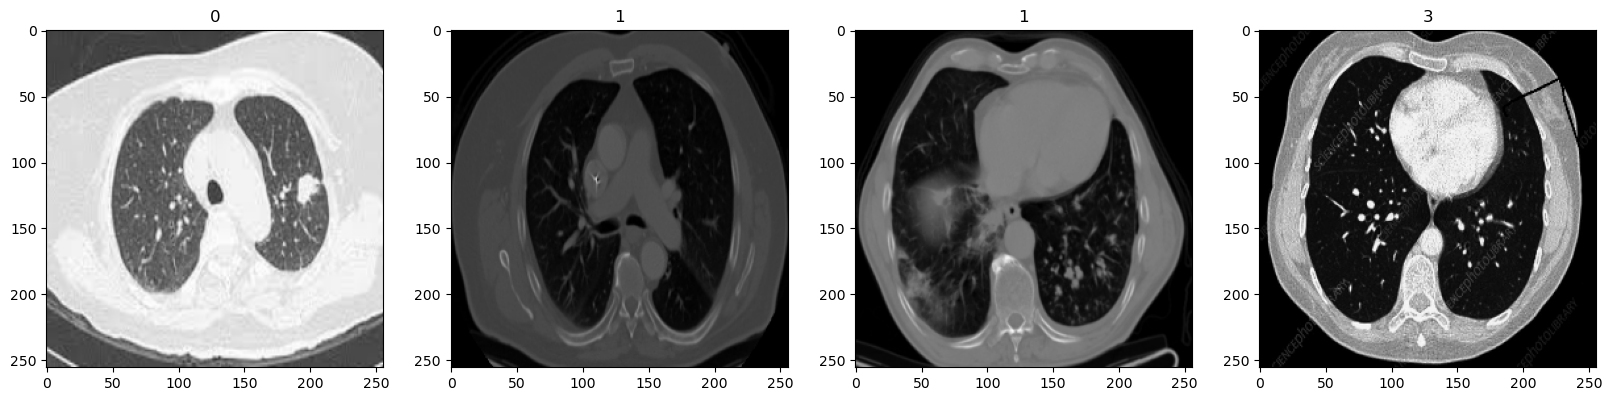

In [9]:
#let us visualize the data 
fig,ax = plt.subplots(ncols =4, figsize =(20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [10]:
#Load the test data 
test_data = tf.keras.utils.image_dataset_from_directory('Data/test/')
test_data_iter = test_data.as_numpy_iterator()
batch1 = test_data_iter.next()
batch1[0].shape
batch1[1]

Found 315 files belonging to 4 classes.


array([2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 3, 2, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 3, 0, 2, 2])

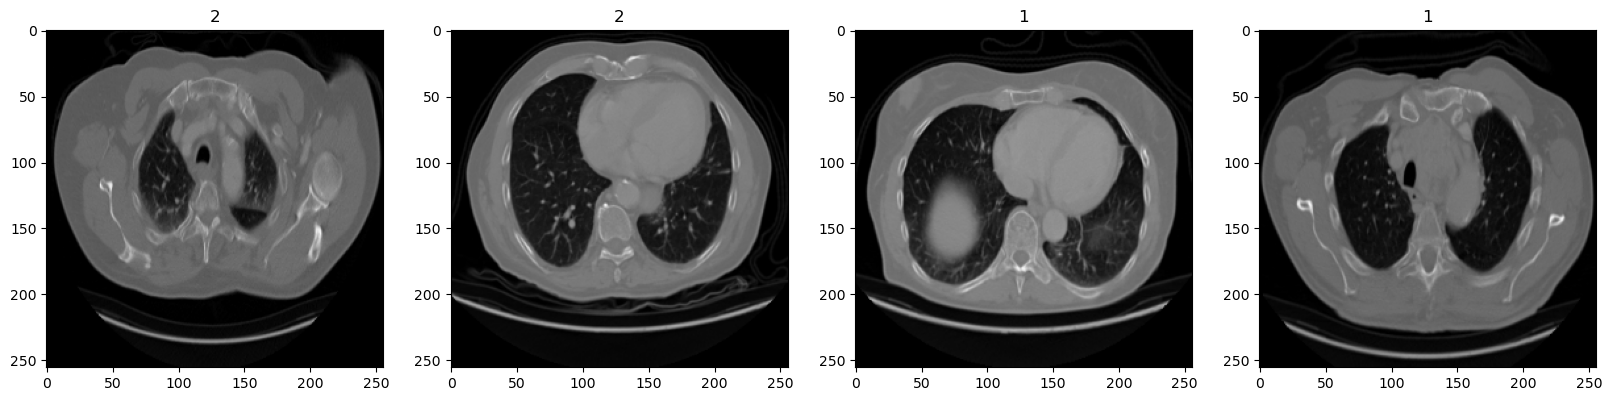

In [11]:
#let us visualize the data 
fig,ax = plt.subplots(ncols =4, figsize =(20,20))
for idx, img in enumerate (batch1[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch1[1][idx])

In [12]:
#loading the valid data
valid_data = tf.keras.utils.image_dataset_from_directory('Data/valid/')
valid_data_iter = valid_data.as_numpy_iterator()
batch2 = valid_data_iter.next()
batch2[0].shape
batch2[1]

Found 72 files belonging to 4 classes.


array([0, 0, 2, 3, 1, 1, 3, 1, 1, 1, 0, 1, 1, 0, 0, 3, 2, 2, 0, 3, 3, 3,
       1, 1, 2, 3, 2, 0, 1, 2, 1, 1])

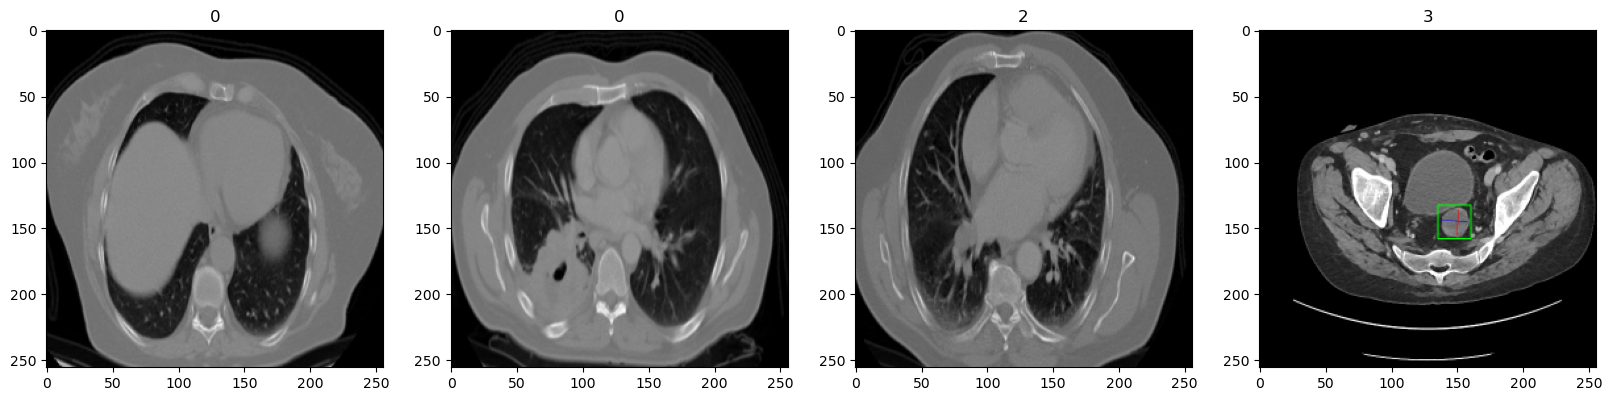

In [13]:
#let us visualize the data 
fig,ax = plt.subplots(ncols =4, figsize =(20,20))
for idx, img in enumerate (batch2[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch2[1][idx])

##### this is the confirmation that the image data has been set up and visualised succesfully now our images can be transformed and are easy to work with. Our data has been already split to train, test and valid form so we do not need to do splitting before the preprocessing and modeling of our data set. 